In [26]:
import torch
from torch import nn # nn contains all of PyTorch's building block neural networks
import matplotlib.pyplot as plt

In [27]:
torch.__version__

'2.5.1'

In [28]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [29]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [30]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c= "b", s = 4, label = "Training data")
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend(prop = {"size": 14})

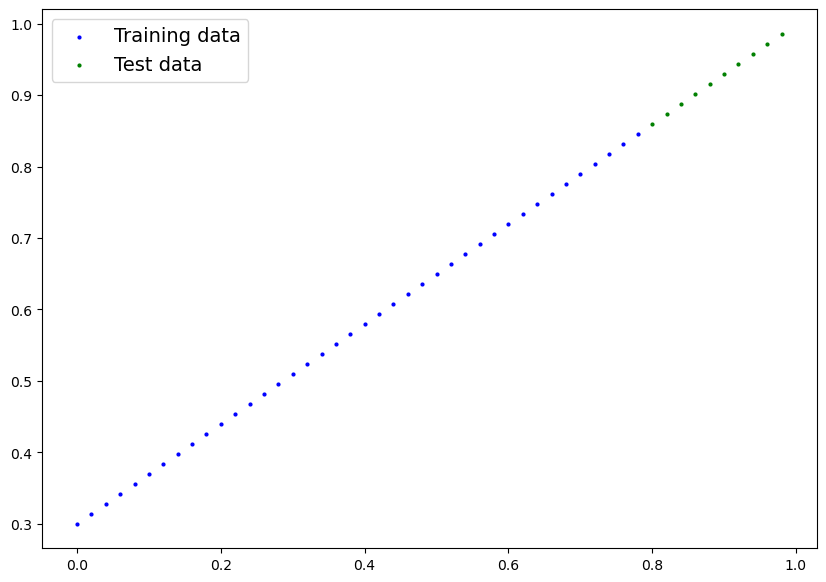

In [31]:
plot_predictions()

In [35]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        

In [38]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters()) 

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [40]:
weight, bias

(0.7, 0.3)

In [42]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [43]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

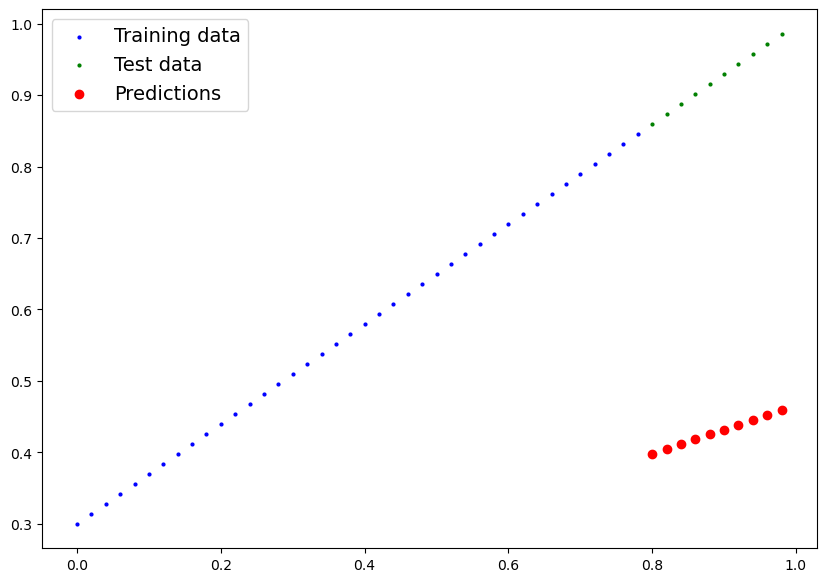

In [44]:
plot_predictions(predictions = y_preds)

In [46]:
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [48]:
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [205]:
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)
    print(f"Loss:",loss)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


Loss: tensor(0.0090, grad_fn=<MeanBackward0>)
Loss: tensor(0.0087, grad_fn=<MeanBackward0>)
Loss: tensor(0.0083, grad_fn=<MeanBackward0>)
Loss: tensor(0.0080, grad_fn=<MeanBackward0>)
Loss: tensor(0.0076, grad_fn=<MeanBackward0>)
Loss: tensor(0.0073, grad_fn=<MeanBackward0>)
Loss: tensor(0.0069, grad_fn=<MeanBackward0>)
Loss: tensor(0.0066, grad_fn=<MeanBackward0>)
Loss: tensor(0.0063, grad_fn=<MeanBackward0>)
Loss: tensor(0.0059, grad_fn=<MeanBackward0>)
Loss: tensor(0.0056, grad_fn=<MeanBackward0>)
Loss: tensor(0.0052, grad_fn=<MeanBackward0>)
Loss: tensor(0.0049, grad_fn=<MeanBackward0>)
Loss: tensor(0.0045, grad_fn=<MeanBackward0>)
Loss: tensor(0.0042, grad_fn=<MeanBackward0>)
Loss: tensor(0.0039, grad_fn=<MeanBackward0>)
Loss: tensor(0.0035, grad_fn=<MeanBackward0>)
Loss: tensor(0.0032, grad_fn=<MeanBackward0>)
Loss: tensor(0.0028, grad_fn=<MeanBackward0>)
Loss: tensor(0.0025, grad_fn=<MeanBackward0>)
Loss: tensor(0.0021, grad_fn=<MeanBackward0>)
Loss: tensor(0.0018, grad_fn=<Mean

In [206]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [207]:
weight, bias

(0.7, 0.3)

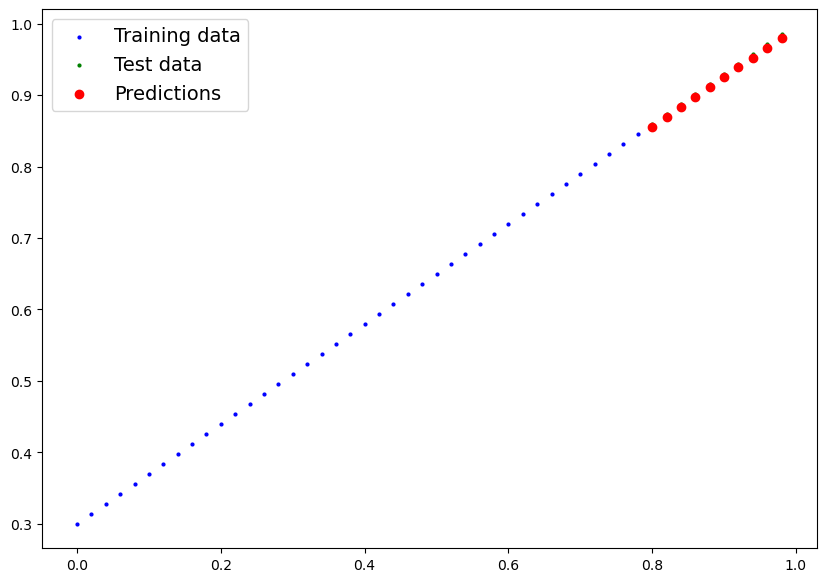

In [208]:
with torch.inference_mode():
    y_predict_new = model_0(X_test)

plot_predictions(predictions = y_predict_new)

In [210]:
model_0.eval()

LinearRegressionModel()

In [213]:
with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

In [216]:
print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 99 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882


In [217]:
from pathlib import Path
MODEL_PATH = Path("models")
    MODEL_PATH.mkdir(exist_ok = True, parents = True)

MODEL_NAME = "01_pytorch-workflow_modle_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('models/01_pytorch-workflow_modle_0.pth')

In [222]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models\01_pytorch-workflow_modle_0.pth


In [223]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [229]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\yj200\AppData\Local\Temp\ipykernel_50420\1951795698.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

<All keys matched successfully>

In [230]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [232]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [233]:
y_preds == loaded_model_0_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [235]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

y_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])